<a href="https://colab.research.google.com/github/iGeology-Illinois/geol581-getting-started-with-python-GouldDirt26/blob/main/Module_2_%E2%80%93_Python_Based_Stereonet_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
# GEOL 593 - Engineering Geology
# Module 2 – Python-Based Stereonet Analysis
# Team 1 (Alex M. Gould, Jordan Gybels, Mike Navarro)

In [75]:
#Import cvs file for data refinement
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving strikes and dips.csv to strikes and dips (3).csv
User uploaded file "strikes and dips (3).csv" with length 3165 bytes


In [76]:
#Install needed drivers
!pip install mplstereonet
import pandas as pd
import numpy as np
import mplstereonet as mpl

In [77]:
#read uploaded file via pandas
df = pd.read_csv('strikes and dips (1).csv')
print(df.head(34))

       ID  Strike   Dip              Date    MeasuredBy  \
0    P1-3    43.3  51.0  2025-01-03 23:24   Carlos Diaz   
1    P2-4   133.5  80.0  2025-01-12 17:55    John Smith   
2    P4-1   119.4  87.8  2025-01-16 02:19   Carlos Diaz   
3    P1-7    43.2  49.4  2025-01-10 19:48  Sarah Parker   
4    P1-2    44.2  50.6  2025-01-15 22:05      Mei Chen   
5    P3-9   226.6  41.4  2025-01-13 01:42   Carlos Diaz   
6    P3-6   226.1  38.1  2025-01-14 15:10      Mei Chen   
7    P2-7   136.1  79.3  2025-01-26 22:19      Mei Chen   
8   P1-10    43.1  51.3  2025-01-30 22:38   Carlos Diaz   
9    P2-9   136.8  81.6  2025-01-24 06:09    John Smith   
10  P3-10   226.4  41.6  2025-01-16 20:34   Carlos Diaz   
11   P2-5   133.2  78.3  2025-01-26 16:34   Carlos Diaz   
12   P1-4    45.4  48.4  2025-01-15 08:16  Sarah Parker   
13   P4-2   351.7  82.2  2025-01-08 05:35   Carlos Diaz   
14   P2-8   136.7  79.5  2025-01-04 08:47  Sarah Parker   
15   P3-4   225.0  41.6  2025-01-04 11:29    John Smith 

In [78]:
#Review Notes and determine points to remove from analysis
df.sort_values(by='Notes')

,ID,Strike,Dip,Date,MeasuredBy,Company,Location,Notes
23,P2-2,133.9,80.4,2025-01-30 11:15,Sarah Parker,Pettijohn and Associates,Site C,Covered with vegetation
14,P2-8,136.7,79.5,2025-01-04 08:47,Sarah Parker,Pettijohn and Associates,Site B,Covered with vegetation
11,P2-5,133.2,78.3,2025-01-26 16:34,Carlos Diaz,Pettijohn and Associates,Site A,Covered with vegetation
16,P2-1,136.0,79.8,2025-01-29 14:31,John Smith,Pettijohn and Associates,Site B,Difficult to see
31,P2-6,134.7,80.2,2025-01-16 01:40,Sarah Parker,Pettijohn and Associates,Site A,Difficult to see
8,P1-10,43.1,51.3,2025-01-30 22:38,Carlos Diaz,Pettijohn and Associates,Site B,Difficult to see
20,P3-7,224.6,39.3,2025-01-07 13:26,Carlos Diaz,Pettijohn and Associates,Site C,Inconsistent bedding
0,P1-3,43.3,51.0,2025-01-03 23:24,Carlos Diaz,Pettijohn and Associates,Site C,Inconsistent bedding
6,P3-6,226.1,38.1,2025-01-14 15:10,Mei Chen,Pettijohn and Associates,Site B,Inconsistent bedding
7,P2-7,136.1,79.3,2025-01-26 22:19,Mei Chen,Pettijohn and Associates,Site B,Inconsistent bedding


In [79]:
# Remove inaccurate data (Points "P4-1", "P4-2", "P4-3", "P2-10","P3-8")
# Review Data as needed such as filtering at various table headings
ids_to_remove = ["P4-1", "P4-2", "P4-3", "P2-10","P3-8"]
df = df[~df['ID'].isin(ids_to_remove)]
df.sort_values(by='ID')

,ID,Strike,Dip,Date,MeasuredBy,Company,Location,Notes
21,P1-1,46.7,51.9,2025-01-05 22:58,Carlos Diaz,Pettijohn and Associates,Site C,Loose scree
8,P1-10,43.1,51.3,2025-01-30 22:38,Carlos Diaz,Pettijohn and Associates,Site B,Difficult to see
4,P1-2,44.2,50.6,2025-01-15 22:05,Mei Chen,Pettijohn and Associates,Site B,Watch for slippage
0,P1-3,43.3,51.0,2025-01-03 23:24,Carlos Diaz,Pettijohn and Associates,Site C,Inconsistent bedding
12,P1-4,45.4,48.4,2025-01-15 08:16,Sarah Parker,Pettijohn and Associates,Site A,Wet outcrop
32,P1-5,44.2,49.7,2025-01-08 04:09,Sarah Parker,Pettijohn and Associates,Site D,Inconsistent bedding
18,P1-6,46.9,50.9,2025-01-17 13:00,John Smith,Pettijohn and Associates,Site D,Uncertain contact
3,P1-7,43.2,49.4,2025-01-10 19:48,Sarah Parker,Pettijohn and Associates,Site C,Loose scree
30,P1-8,46.0,50.7,2025-01-03 08:12,Sarah Parker,Pettijohn and Associates,Site D,Loose scree
22,P1-9,45.8,48.8,2025-01-18 22:54,John Smith,Pettijohn and Associates,Site A,Uncertain contact


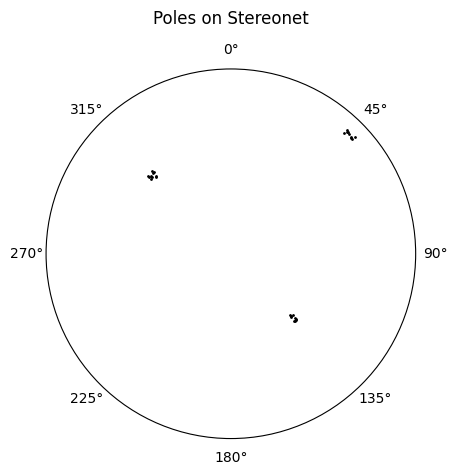

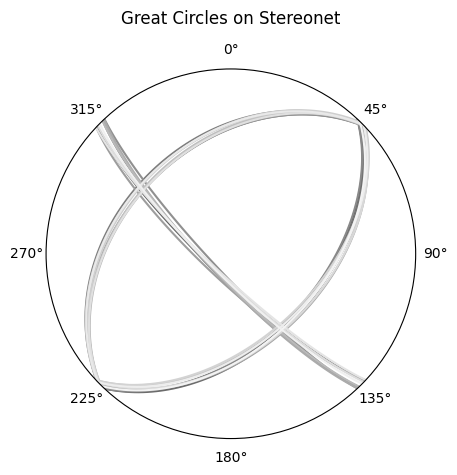

In [108]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Figure 1: Poles on Stereonet
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='stereonet')

# Define strikes and dips
strikes = df['Strike']
dips = df['Dip']

# Edit Figure marker size and color before generating figure
ax1.pole(strikes, dips, markersize=1, color='black')
ax1.set_title('Poles on Stereonet', y=1.1)
fig1.show()

# Figure 2: Great Circles (Planes)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='stereonet')

# Generate a list of shades of black/grey for each plane
num_planes = len(strikes)

# linspace from 0.3 to 0.9 for varied darker shades
colors = cm.Greys_r(np.linspace(0.3, 0.9, num_planes))

# Plot each plane individually with its corresponding color
for i in range(num_planes):
    ax2.plane(strikes.iloc[i], dips.iloc[i], color=colors[i])

ax2.set_title('Great Circles on Stereonet', y=1.1)
fig2.show()

In [100]:
#Generate Average Strike/Dip by K-means
from sklearn.cluster import KMeans

# Select 'Strike' and 'Dip' columns
X = df[['Strike', 'Dip']]

# Instantiate KMeans with n_clusters=3, random_state=42, and n_init='auto'
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')

# Fit the KMeans model to the data
kmeans.fit(X)

# Assign cluster labels back to the DataFrame
df['Cluster'] = kmeans.labels_

print("K-means clustering applied and cluster labels added to DataFrame.")
print(df.head())

K-means clustering applied and cluster labels added to DataFrame.
     ID  Strike   Dip              Date    MeasuredBy  \
0  P1-3    43.3  51.0  2025-01-03 23:24   Carlos Diaz   
1  P2-4   133.5  80.0  2025-01-12 17:55    John Smith   
3  P1-7    43.2  49.4  2025-01-10 19:48  Sarah Parker   
4  P1-2    44.2  50.6  2025-01-15 22:05      Mei Chen   
5  P3-9   226.6  41.4  2025-01-13 01:42   Carlos Diaz   

                    Company Location                 Notes  Cluster  
0  Pettijohn and Associates   Site C  Inconsistent bedding        2  
1  Pettijohn and Associates   Site D     Uncertain contact        0  
3  Pettijohn and Associates   Site C           Loose scree        2  
4  Pettijohn and Associates   Site B    Watch for slippage        2  
5  Pettijohn and Associates   Site A    Watch for slippage        1  


In [83]:
cluster_means = df.groupby('Cluster')[['Strike', 'Dip']].mean()
print("Mean Strike and Dip for each cluster:")
print(cluster_means)

Mean Strike and Dip for each cluster:
             Strike        Dip
Cluster                       
0        134.888889  80.000000
1        225.744444  40.266667
2         44.880000  50.270000
